In [77]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

In [78]:
im = io.imread('wood_disk.tif')
image = im.copy()
image.shape
[rows,cols]=image.shape
image.shape

(531, 675)

In [79]:
# Binarization
for r in range(rows):
    for c in range(cols):
        if image[r][c] > 100:
            image[r][c] = 255
        else:
            image[r][c] = 0


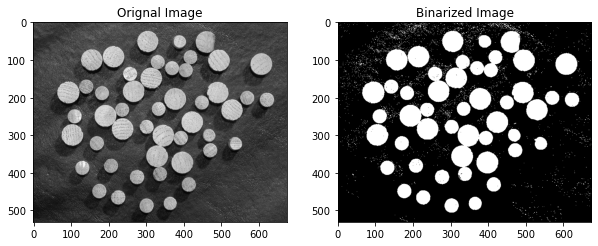

In [80]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("Orignal Image")
plt.imshow(im, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Binarized Image")
plt.imshow(image, cmap="gray")


# Erosion

In [81]:
image_e = image.copy()
sz = 5 # Size of structuring element is 5*5
SE = 255 * np.ones([sz,sz]) # We need to erode white so we multiply with 255
center = int((sz-1)/2)  # indexing is from 0 so max value is 4 so sz - 1

In [82]:
for r in range(center,rows):
    for c in range(center,cols):
        temp = image[r-center:r+center+1,c-center:c+center+1]
        if np.array_equal(temp,SE):
            image_e[r][c] = 255
        else:
            image_e[r][c] = 0

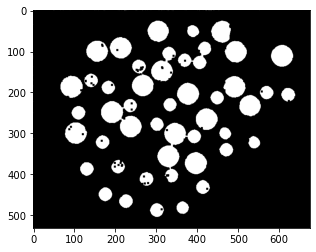

In [83]:
plt.imshow(image_e, cmap = 'gray')

In [89]:
image_d = image.copy()
sz = 9 # Size of structuring element is 5*5
SE = 255 * np.ones([sz,sz]) # We need to erode white so we multiply with 255
center = int((sz-1)/2)  # indexing is from 0 so max value is 4 so sz - 1

In [90]:
for r in range(center,rows):
    for c in range(center,cols):
        temp = image[r-center:r+center+1,c-center:c+center+1]
        if np.isin(255,temp):    # Checks whether if one of them is common
            image_d[r][c] = 255
        else:
            image_d[r][c] = 0

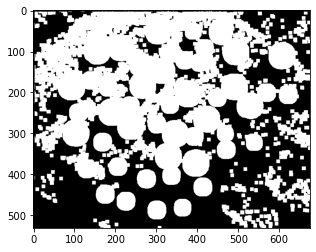

In [91]:
plt.imshow(image_d, cmap = 'gray')

# Dilation

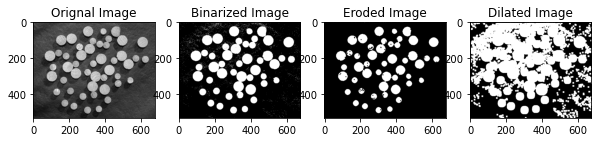

In [92]:
plt.figure(figsize = (10,10))
plt.subplot(1,4,1)
plt.title("Orignal Image")
plt.imshow(im, cmap = 'gray')
plt.subplot(1,4,2)
plt.title("Binarized Image")
plt.imshow(image, cmap="gray")
plt.subplot(1,4,3)
plt.title("Eroded Image")
plt.imshow(image_e, cmap = 'gray')
plt.subplot(1,4,4)
plt.title("Dilated Image")
plt.imshow(image_d, cmap="gray")

# Dilation on eroded image

In [105]:
for r in range(center,rows):
    for c in range(center,cols):
        temp = image_e[r-center:r+center+1,c-center:c+center+1]
        if np.isin(255,temp):    # Checks whether if one of them is common
            image_d[r][c] = 255
        else:
            image_d[r][c] = 0

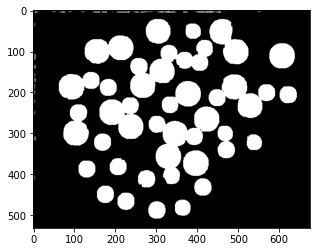

In [94]:
plt.imshow(image_d, cmap = 'gray')

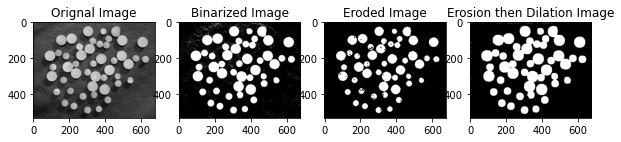

In [106]:
plt.figure(figsize = (10,10))
plt.subplot(1,4,1)
plt.title("Orignal Image")
plt.imshow(im, cmap = 'gray')
plt.subplot(1,4,2)
plt.title("Binarized Image")
plt.imshow(image, cmap="gray")
plt.subplot(1,4,3)
plt.title("Eroded Image")
plt.imshow(image_e, cmap = 'gray')
plt.subplot(1,4,4)
plt.title("Erosion then Dilation Image")
plt.imshow(image_d, cmap="gray")


The given image is eroded using a structring element of size 5*5 the eroded image shows all the noisy pixels of 5*5 has disappeared and size of white circle reduces to a smaller value. If the size of structring element is increased to 19*19 , the result is fewer circles are visible and oobserved.
The given image is dilated using sq SE of size 5*5 it is observed that size of all the objects increase by two rows and two columns. If the SE is increased to a larger size then the size of objects of dilated image increases.  
To remove noisy pixels of given image, the image is eroded by SE of size 11x11 which removes all the objects of size 11x11.
However to regain the size of orignal smaller objects, eroded image is dilated using SE of same size.   
So the final image is a clean image without any noisy objects.